In [1]:
import numpy as np
import importlib
import matplotlib.pyplot as plt
import os

import representation
import kex_data
import kex_headers
import listmode
import petlink
import position
import e7tools
import filefit as ff
import visual
import volume_view as vv

In [2]:
mhdrs = kex_data.get_sino_mainhdrs()
npath = kex_data.NORM_PATH
output_dir = r"C:/Users/petct/Desktop/Hugo/Code/PythonMEX/dcr_recon/"
ff.prep_folder(output_dir[:-1], [])

In [3]:
importlib.reload(e7tools)
recon_all = False
ref = 0
for k, dcr, e in zip(range(4), kex_data.RECON_DCR, mhdrs):
    if recon_all or k == ref:
        recon_path = output_dir + e.split("/")[-1]
        print("recon_path", recon_path)
        print("returncode: ", e7tools.kex_recon(e, 
                                                npath, 
                                                recon_path, 
                                                verbose=True, 
                                                dcr=dcr))      

recon_path C:/Users/petct/Desktop/Hugo/Code/PythonMEX/dcr_recon/CylinderPET-LM-00-sino.mhdr
stdout
 b''
stderr
 b"I 05/29/2020 15:07:35.175 (UTC+01:00) Intel(R) Core(TM) i7-7820HQ CPU @ 2.90GHz (1x)    memory: 32629 MByte
I 05/29/2020 15:07:35.175 (UTC+01:00) Number of NUMA nodes: 1
I 05/29/2020 15:07:35.175 (UTC+01:00) Number of physical processor packages: 1
I 05/29/2020 15:07:35.175 (UTC+01:00) Number of processor cores: 4
I 05/29/2020 15:07:35.175 (UTC+01:00) Number of logical processors: 8
I 05/29/2020 15:07:35.175 (UTC+01:00) Number of processor L1/L2/L3 caches: 8/4/1 
I 05/29/2020 15:07:35.175 (UTC+01:00) Hyper-Threadingin BIOS Enabled.
I 05/29/2020 15:07:35.175 (UTC+01:00)  supported CPU features: MMX,SSE,SSE2,SSE3,SSE4.1,SSE4.2,AVX
I 05/29/2020 15:07:35.346 (UTC+01:00) GPU Driver Version: 24.20.100.6286
I 05/29/2020 15:07:35.346 (UTC+01:00) GPU Driver supported CUDA Version: 9010
I 05/29/2020 15:07:35.346 (UTC+01:00) CUDA Run-time Version Used: 5000
I 05/29/2020 15:07:35.347 (

In [4]:
def my_plot(kex_recons):
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20,20))
    newphantom = True
    for vol, row in zip(kex_recons, axes):
        viewpairs = [(1,2), (0,2), (0,1)]
        position = [47, 120, 99]
        ims = vv.plot_views(vol, position, viewpairs, row)
        if newphantom:
            newphantom = False
            pims = ims
            prows = row
        else:
            pims = pims + ims
            prows = np.append(prows, row)
            visual.same_colorbar(fig, pims, prows)
            newphantom = True
        dimlabels = kex_headers.IMAGE_DIMENSION_TITLES
        vv.set_labels(viewpairs, row, dimlabels)
        pos_strings = vv.get_position_strings(position, viewpairs)
        ref_str = vv.get_position_string(dimlabels, [])
        for title, ax in zip(pos_strings, row):
            ax.set_title("view at " +ref_str +"="+ title)

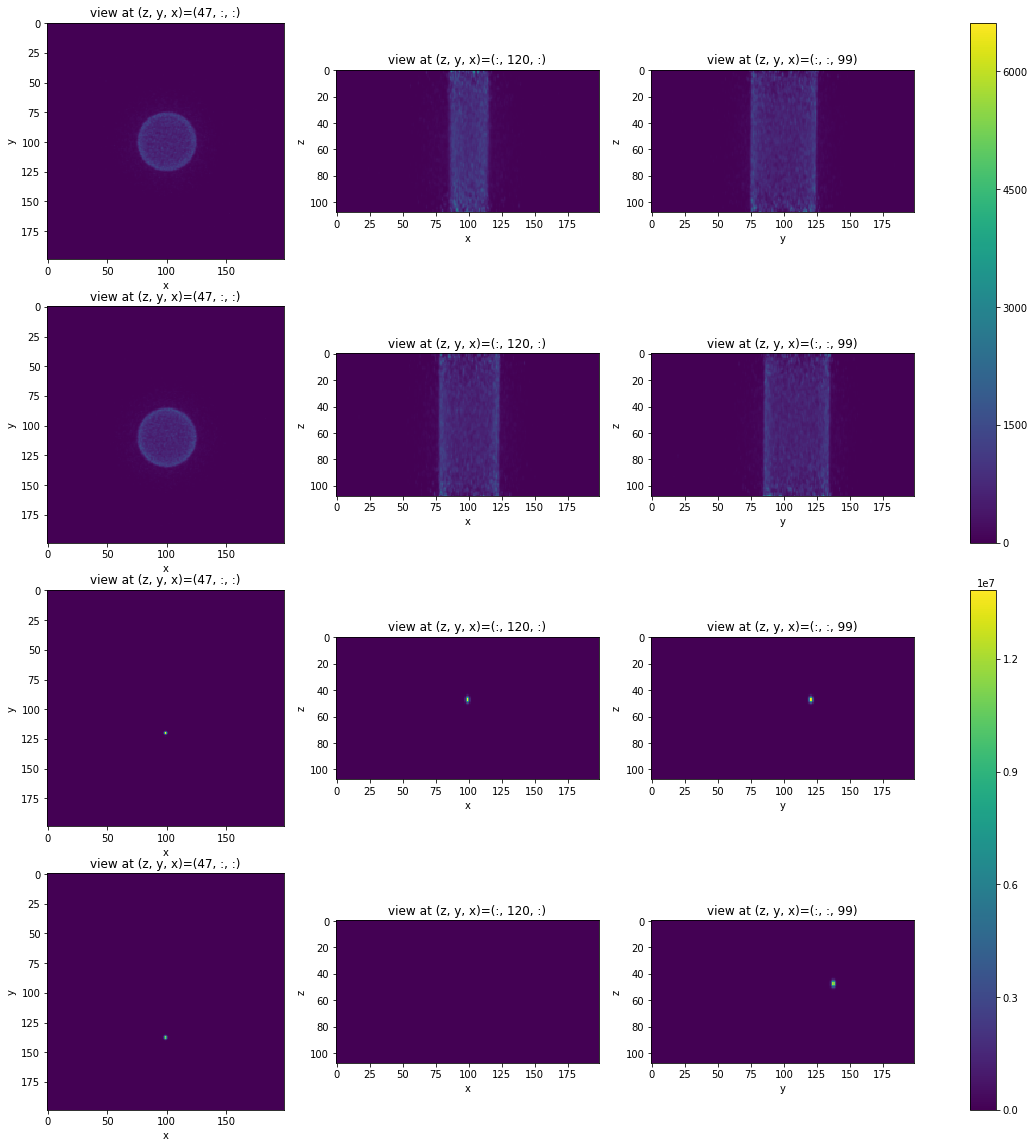

In [5]:
my_recons = [ff.get_v_data(v) for v in ff.get_path_selection(output_dir, 'v')]
my_plot(my_recons)

In [6]:
dicom_recon, dicom_paths = kex_data.reconstructions()
print(dicom_paths)
ref_recons = [ff.get_v_data(path[:-len("-DICOM")]) for path in dicom_paths]

['C:/Users/petct/Desktop/CylinderPET-Converted/CylinderPET-LM-00/CylinderPET-LM-00-OPTOF_000_000.v-DICOM', 'C:/Users/petct/Desktop/CylinderPET-Converted/CylinderPET-LM-01/CylinderPET-LM-01-OPTOF_000_000.v-DICOM', 'C:/Users/petct/Desktop/KanylPET-Converted/KanylPET-LM-00/KanylPET-LM-00-OPTOF_000_000.v-DICOM', 'C:/Users/petct/Desktop/KanylPET-Converted/KanylPET-LM-01/KanylPET-LM-01-OPTOF_000_000.v-DICOM']


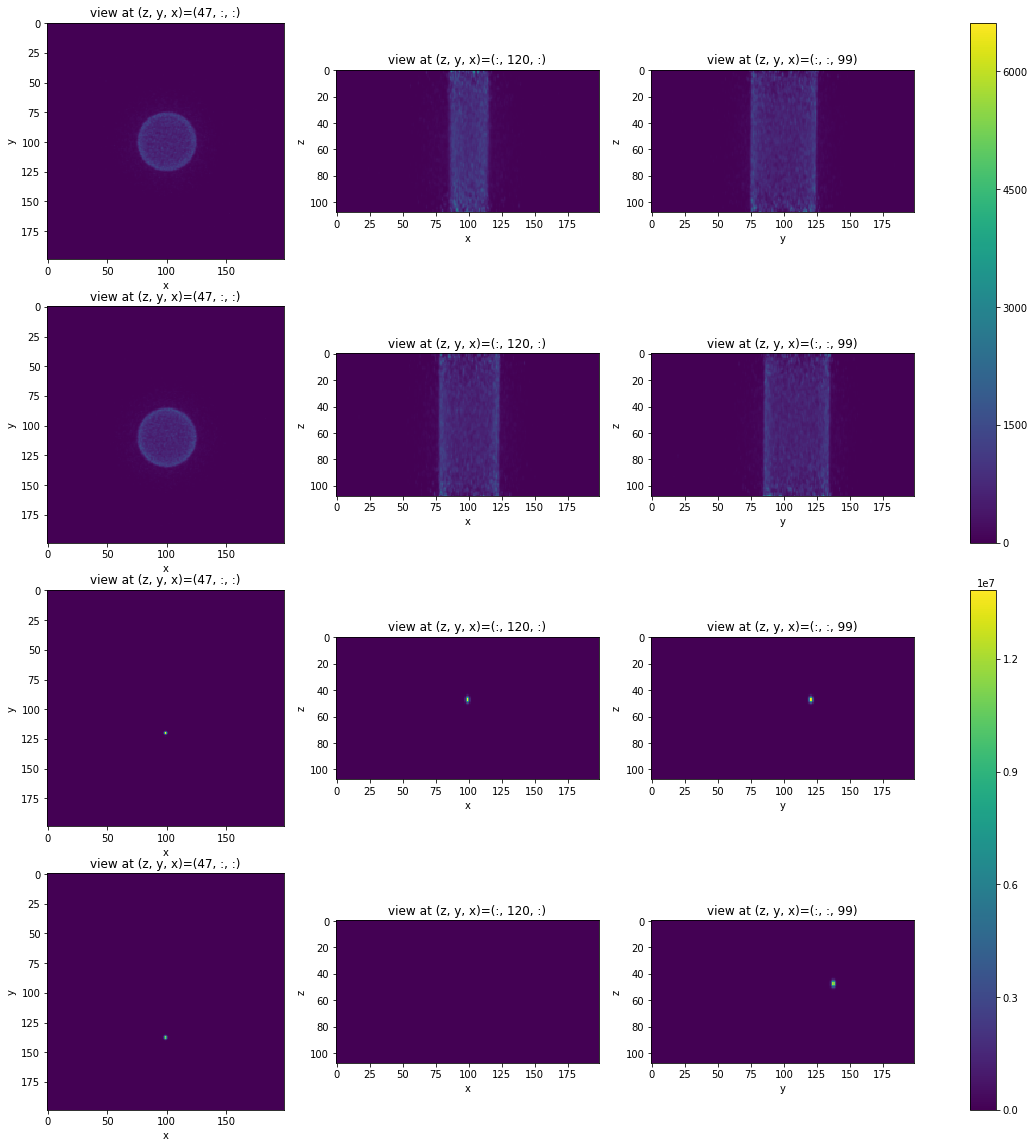

In [7]:
my_plot(ref_recons)

In [14]:
diffs = []
print("compare my reconstructions with references")
for k,a,b in zip(range(4), my_recons, ref_recons):
    diff = b-a
    print("scan:", kex_data.DATA_KEYS[k])
    neq = diff != 0
    count = np.sum(diff != 0)
    s = np.sum(diff)
    print("nonzero diff count", count)
    print("diff sum", s)
    diffs.append(diff)

compare my reconstructions with references
scan: cylinder 0
nonzero diff count 0
diff sum 0.0
scan: cylinder 1
nonzero diff count 0
diff sum 0.0
scan: cannula 0
nonzero diff count 0
diff sum 0.0
scan: cannula 1
nonzero diff count 0
diff sum 0.0
